<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Practical 2b - Predicting House Prices</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.2.4-tf


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Objectives
After completing this practical exercise, students should be able to:
1. [Build a neural network model to predict house prices](#demo)
2. [Exercise- tuning several model parameters](#exc)

## 1. Predicting house prices (a regression example) <a id='demo' />

### 1.1 The Boston Housing Price dataset

We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the 
suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset has only 506 samples, split between 404 training samples and 102 test samples. Let's take a look at the data:

In [3]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
print(train_data[100])

[6.1290e-02 2.0000e+01 3.3300e+00 1.0000e+00 4.4290e-01 7.6450e+00
 4.9700e+01 5.2119e+00 5.0000e+00 2.1600e+02 1.4900e+01 3.7707e+02
 3.0100e+00]


In [6]:
test_data.shape

(102, 13)


As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features (details are shown below) and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [7]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between $10,000  -  $50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not inflation-adjusted.

### 1.2 Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to 
automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

In [8]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities that we use for normalizing the test data have been computed using the training data. We should never use in our workflow any quantity computed on the test data, even for something as simple as data normalization.

In [9]:
print(train_data[100])

[-0.39914449  0.35890566 -1.14281587  3.89358447 -0.97702129  1.9437178
 -0.69198737  0.72576261 -0.51114231 -1.1428069  -1.62718308  0.23710757
 -1.34300395]


### 1.3 Building our network


Because so few samples are available, we will be using a very small network with two 
hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using 
a small network is one way to mitigate overfitting.

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                        input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Our network ends with a single unit, and no activation (i.e. linear layer). This is a typical setup for scalar regression. Because the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we are compiling the network with the `mse` loss function -- Mean Squared Error, the square of the difference between the predictions and the targets, a widely used loss function for regression problems.

We are also monitoring a new metric during training: `mae`. This stands for Mean Absolute Error. It is simply the absolute value of the difference between the predictions and the targets. For instance, a MAE of 0.5 on this problem would mean that our predictions are off by 
\$500 on average.

In [11]:
model.fit(train_data, train_targets, validation_split =0.2, epochs = 200, batch_size = 1)

Train on 323 samples, validate on 81 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
323/323 [==============================] - 1s 2ms/sample - loss: 206.1396 - mean_absolute_error: 10.3769 - val_loss: 45.1883 - val_mean_absolute_error: 4.6951
Epoch 2/200
323/323 [==============================] - 0s 1ms/sample - loss: 32.3515 - mean_absolute_error: 3.6449 - val_loss: 30.0508 - val_mean_absolute_error: 3.6180
Epoch 3/200
323/323 [==============================] - 0s 2ms/sample - loss: 25.3759 - mean_absolute_error: 3.0862 - val_loss: 23.9728 - val_mean_absolute_error: 3.2097
Epoch 4/200
323/323 [==============================] - 0s 1ms/sample - loss: 20.5955 - mean_absolute_error: 2.7743 - val_loss: 20.4181 - val_mean_absolute_error: 3.0053
Epoch 5/200
323/323 [==============================] - 0s 1ms/sample - loss: 18.5105 - mean_absolute_error: 2.6434 - val_loss: 17.8252 - val_mean_absolute_error: 2.8760
Epoch 6/200
323/323 [==============================] - 0s 1m

323/323 [==============================] - 0s 1ms/sample - loss: 6.2749 - mean_absolute_error: 1.6667 - val_loss: 14.2903 - val_mean_absolute_error: 2.5600
Epoch 48/200
323/323 [==============================] - 0s 2ms/sample - loss: 5.4950 - mean_absolute_error: 1.5784 - val_loss: 15.3475 - val_mean_absolute_error: 2.6577
Epoch 49/200
323/323 [==============================] - 1s 2ms/sample - loss: 6.1077 - mean_absolute_error: 1.6312 - val_loss: 19.4057 - val_mean_absolute_error: 2.8722
Epoch 50/200
323/323 [==============================] - 0s 2ms/sample - loss: 5.5728 - mean_absolute_error: 1.5420 - val_loss: 16.9087 - val_mean_absolute_error: 2.6101
Epoch 51/200
323/323 [==============================] - 0s 2ms/sample - loss: 5.2823 - mean_absolute_error: 1.5510 - val_loss: 14.5166 - val_mean_absolute_error: 2.6618
Epoch 52/200
323/323 [==============================] - 0s 1ms/sample - loss: 5.9787 - mean_absolute_error: 1.5688 - val_loss: 15.1487 - val_mean_absolute_error: 2.6349

323/323 [==============================] - 1s 2ms/sample - loss: 3.8538 - mean_absolute_error: 1.2243 - val_loss: 15.8183 - val_mean_absolute_error: 2.6490
Epoch 96/200
323/323 [==============================] - 0s 1ms/sample - loss: 3.6338 - mean_absolute_error: 1.3299 - val_loss: 24.5264 - val_mean_absolute_error: 3.0809
Epoch 97/200
323/323 [==============================] - 0s 1ms/sample - loss: 4.2002 - mean_absolute_error: 1.3385 - val_loss: 20.3701 - val_mean_absolute_error: 2.8480
Epoch 98/200
323/323 [==============================] - 0s 1ms/sample - loss: 4.2183 - mean_absolute_error: 1.3723 - val_loss: 19.3108 - val_mean_absolute_error: 2.7117
Epoch 99/200
323/323 [==============================] - 0s 1ms/sample - loss: 4.0012 - mean_absolute_error: 1.2688 - val_loss: 18.9339 - val_mean_absolute_error: 2.7457
Epoch 100/200
323/323 [==============================] - 0s 1ms/sample - loss: 3.9697 - mean_absolute_error: 1.2691 - val_loss: 15.4772 - val_mean_absolute_error: 2.635

323/323 [==============================] - 0s 1ms/sample - loss: 2.9385 - mean_absolute_error: 1.1453 - val_loss: 17.1478 - val_mean_absolute_error: 2.8092
Epoch 144/200
323/323 [==============================] - 0s 1ms/sample - loss: 3.0397 - mean_absolute_error: 1.1709 - val_loss: 15.7835 - val_mean_absolute_error: 2.5979
Epoch 145/200
323/323 [==============================] - 0s 1ms/sample - loss: 2.8193 - mean_absolute_error: 1.1172 - val_loss: 17.9077 - val_mean_absolute_error: 2.8560
Epoch 146/200
323/323 [==============================] - 0s 2ms/sample - loss: 2.8454 - mean_absolute_error: 1.1603 - val_loss: 16.8769 - val_mean_absolute_error: 2.8351
Epoch 147/200
323/323 [==============================] - 0s 1ms/sample - loss: 2.5878 - mean_absolute_error: 1.1105 - val_loss: 16.5554 - val_mean_absolute_error: 2.6960
Epoch 148/200
323/323 [==============================] - 1s 2ms/sample - loss: 2.5936 - mean_absolute_error: 1.1122 - val_loss: 15.8445 - val_mean_absolute_error: 2

323/323 [==============================] - 0s 1ms/sample - loss: 2.0836 - mean_absolute_error: 1.0405 - val_loss: 16.1282 - val_mean_absolute_error: 2.8828
Epoch 192/200
323/323 [==============================] - 0s 1ms/sample - loss: 2.3203 - mean_absolute_error: 1.0465 - val_loss: 17.4468 - val_mean_absolute_error: 2.8954
Epoch 193/200
323/323 [==============================] - 0s 1ms/sample - loss: 2.3259 - mean_absolute_error: 1.0522 - val_loss: 16.2311 - val_mean_absolute_error: 2.7667
Epoch 194/200
323/323 [==============================] - 0s 1ms/sample - loss: 2.1581 - mean_absolute_error: 1.0315 - val_loss: 17.4164 - val_mean_absolute_error: 2.7155
Epoch 195/200
323/323 [==============================] - 0s 2ms/sample - loss: 2.2902 - mean_absolute_error: 1.0518 - val_loss: 14.3749 - val_mean_absolute_error: 2.8027
Epoch 196/200
323/323 [==============================] - 0s 1ms/sample - loss: 2.0272 - mean_absolute_error: 1.0228 - val_loss: 15.1634 - val_mean_absolute_error: 2

As you can see, the model very quickly overfits to the training data, so we should stop it before it overfits. Now the question is when to stop? We will use K-fold validation to figure out in the next secsion.  

Because you'll need to instantiate the same model multiple times, you use a function to construct it.

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### 1.4 Validating our approach using K-fold validation

To evaluate our network while we keep adjusting its parameters (e.g. the number of epochs), we use K-fold cross-validation because we have so few data points. It splits the data into K partitions, then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

In [13]:
from tensorflow.keras import backend as K
# Some memory clean-up
K.clear_session()

In [14]:
import numpy as np

k = 5
num_val_samples = len(train_data) // k
num_epochs = 120
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=1)
    print(history.history.keys())
    mae_history = history.history['val_mean_absolute_error']
    #mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 324 samples, validate on 80 samples
Epoch 1/120
324/324 [==============================] - 1s 2ms/sample - loss: 185.8006 - mean_absolute_error: 9.8539 - val_loss: 27.3299 - val_mean_absolute_error: 3.1464
Epoch 2/120
324/324 [==============================] - 0s 2ms/sample - loss: 23.4462 - mean_absolute_error: 3.3800 - val_loss: 20.8856 - val_mean_absolute_error: 2.6995
Epoch 3/120
324/324 [==============================] - 0s 2ms/sample - loss: 18.8383 - mean_absolute_error: 2.9413 - val_loss: 16.8749 - val_mean_absolute_error: 2.6232
Epoch 4/120
324/324 [==============================] - 0s 1ms/sample - loss: 16.4527 - mean_absolute_error: 2.7104 - val_loss: 15.7304 - val_mean_absolute_error: 2.3385
Epoch 5/120
324/324 [==============================] - 0s 1ms/sample - loss: 15.0396 - mean_absolute_error: 2.5964 - val_loss: 13.5967 - val_mean_absolute_error: 2.1064
Epoch 6/120
324/324 [==============================] - 0s 1ms/sample - loss: 14.4155 - me

324/324 [==============================] - 0s 1ms/sample - loss: 6.9200 - mean_absolute_error: 1.7751 - val_loss: 7.2300 - val_mean_absolute_error: 1.7721
Epoch 50/120
324/324 [==============================] - 1s 2ms/sample - loss: 6.5555 - mean_absolute_error: 1.7162 - val_loss: 6.8477 - val_mean_absolute_error: 1.8995
Epoch 51/120
324/324 [==============================] - 1s 2ms/sample - loss: 6.5809 - mean_absolute_error: 1.6935 - val_loss: 7.4922 - val_mean_absolute_error: 1.9001
Epoch 52/120
324/324 [==============================] - 0s 2ms/sample - loss: 6.6973 - mean_absolute_error: 1.7070 - val_loss: 6.7549 - val_mean_absolute_error: 1.6737
Epoch 53/120
324/324 [==============================] - 0s 2ms/sample - loss: 6.6737 - mean_absolute_error: 1.6968 - val_loss: 8.3184 - val_mean_absolute_error: 2.1123
Epoch 54/120
324/324 [==============================] - 1s 2ms/sample - loss: 6.7287 - mean_absolute_error: 1.7445 - val_loss: 7.3302 - val_mean_absolute_error: 1.7788
Epoch

Epoch 98/120
324/324 [==============================] - 0s 1ms/sample - loss: 4.5542 - mean_absolute_error: 1.4631 - val_loss: 7.5134 - val_mean_absolute_error: 1.9621
Epoch 99/120
324/324 [==============================] - 1s 2ms/sample - loss: 4.7237 - mean_absolute_error: 1.4766 - val_loss: 12.3135 - val_mean_absolute_error: 2.7851
Epoch 100/120
324/324 [==============================] - 1s 2ms/sample - loss: 4.5386 - mean_absolute_error: 1.3820 - val_loss: 7.8175 - val_mean_absolute_error: 1.9975
Epoch 101/120
324/324 [==============================] - 1s 2ms/sample - loss: 4.5841 - mean_absolute_error: 1.4370 - val_loss: 6.8622 - val_mean_absolute_error: 1.9750
Epoch 102/120
324/324 [==============================] - 0s 1ms/sample - loss: 4.4982 - mean_absolute_error: 1.4015 - val_loss: 6.8297 - val_mean_absolute_error: 1.7646
Epoch 103/120
324/324 [==============================] - 0s 1ms/sample - loss: 4.5562 - mean_absolute_error: 1.4455 - val_loss: 6.7570 - val_mean_absolute_e

324/324 [==============================] - 0s 1ms/sample - loss: 7.4147 - mean_absolute_error: 1.8337 - val_loss: 11.1248 - val_mean_absolute_error: 2.5981
Epoch 26/120
324/324 [==============================] - 0s 1ms/sample - loss: 7.3022 - mean_absolute_error: 1.8026 - val_loss: 11.8669 - val_mean_absolute_error: 2.5937
Epoch 27/120
324/324 [==============================] - 0s 2ms/sample - loss: 6.9568 - mean_absolute_error: 1.7568 - val_loss: 11.0243 - val_mean_absolute_error: 2.5601
Epoch 28/120
324/324 [==============================] - 0s 1ms/sample - loss: 7.5554 - mean_absolute_error: 1.8050 - val_loss: 13.0915 - val_mean_absolute_error: 2.7717
Epoch 29/120
324/324 [==============================] - 0s 1ms/sample - loss: 6.8862 - mean_absolute_error: 1.7820 - val_loss: 9.3273 - val_mean_absolute_error: 2.3617
Epoch 30/120
324/324 [==============================] - 0s 1ms/sample - loss: 6.7213 - mean_absolute_error: 1.7819 - val_loss: 9.6180 - val_mean_absolute_error: 2.4789
E

324/324 [==============================] - 0s 1ms/sample - loss: 4.1745 - mean_absolute_error: 1.4094 - val_loss: 12.5295 - val_mean_absolute_error: 2.5364
Epoch 74/120
324/324 [==============================] - 0s 1ms/sample - loss: 4.5341 - mean_absolute_error: 1.4357 - val_loss: 14.0294 - val_mean_absolute_error: 2.7234
Epoch 75/120
324/324 [==============================] - 0s 1ms/sample - loss: 4.1442 - mean_absolute_error: 1.3907 - val_loss: 10.8018 - val_mean_absolute_error: 2.4832
Epoch 76/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.8221 - mean_absolute_error: 1.3132 - val_loss: 19.0130 - val_mean_absolute_error: 3.0239
Epoch 77/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.8813 - mean_absolute_error: 1.4089 - val_loss: 10.4221 - val_mean_absolute_error: 2.2995
Epoch 78/120
324/324 [==============================] - 0s 1ms/sample - loss: 4.1116 - mean_absolute_error: 1.3858 - val_loss: 8.8535 - val_mean_absolute_error: 2.1649


Train on 324 samples, validate on 80 samples
Epoch 1/120
324/324 [==============================] - 1s 3ms/sample - loss: 182.4068 - mean_absolute_error: 10.0021 - val_loss: 21.6610 - val_mean_absolute_error: 3.5639
Epoch 2/120
324/324 [==============================] - 1s 2ms/sample - loss: 29.2805 - mean_absolute_error: 3.6934 - val_loss: 13.1012 - val_mean_absolute_error: 2.8522
Epoch 3/120
324/324 [==============================] - 1s 2ms/sample - loss: 21.3417 - mean_absolute_error: 3.0600 - val_loss: 13.1677 - val_mean_absolute_error: 2.8616
Epoch 4/120
324/324 [==============================] - 0s 2ms/sample - loss: 17.6672 - mean_absolute_error: 2.7587 - val_loss: 8.9045 - val_mean_absolute_error: 2.2634
Epoch 5/120
324/324 [==============================] - 0s 2ms/sample - loss: 14.5869 - mean_absolute_error: 2.5887 - val_loss: 9.6487 - val_mean_absolute_error: 2.4898
Epoch 6/120
324/324 [==============================] - 0s 1ms/sample - loss: 14.3274 - mean_absolute_error: 2.

324/324 [==============================] - 0s 1ms/sample - loss: 6.3825 - mean_absolute_error: 1.6335 - val_loss: 7.6952 - val_mean_absolute_error: 2.0839
Epoch 50/120
324/324 [==============================] - 0s 1ms/sample - loss: 6.2686 - mean_absolute_error: 1.5887 - val_loss: 8.7857 - val_mean_absolute_error: 2.2400
Epoch 51/120
324/324 [==============================] - 0s 2ms/sample - loss: 6.1881 - mean_absolute_error: 1.5733 - val_loss: 7.9975 - val_mean_absolute_error: 2.1618
Epoch 52/120
324/324 [==============================] - 1s 2ms/sample - loss: 5.9879 - mean_absolute_error: 1.5477 - val_loss: 8.1155 - val_mean_absolute_error: 2.2433
Epoch 53/120
324/324 [==============================] - 0s 2ms/sample - loss: 6.1269 - mean_absolute_error: 1.5810 - val_loss: 8.3211 - val_mean_absolute_error: 2.1286
Epoch 54/120
324/324 [==============================] - 1s 2ms/sample - loss: 6.0425 - mean_absolute_error: 1.5067 - val_loss: 7.7143 - val_mean_absolute_error: 2.0732
Epoch

Epoch 98/120
324/324 [==============================] - 0s 2ms/sample - loss: 3.8075 - mean_absolute_error: 1.3200 - val_loss: 11.4624 - val_mean_absolute_error: 2.6828
Epoch 99/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.7971 - mean_absolute_error: 1.3306 - val_loss: 11.0057 - val_mean_absolute_error: 2.4159
Epoch 100/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.6052 - mean_absolute_error: 1.2781 - val_loss: 13.1545 - val_mean_absolute_error: 2.5135
Epoch 101/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.7973 - mean_absolute_error: 1.3016 - val_loss: 9.8898 - val_mean_absolute_error: 2.3973
Epoch 102/120
324/324 [==============================] - 1s 2ms/sample - loss: 3.5591 - mean_absolute_error: 1.2424 - val_loss: 10.8704 - val_mean_absolute_error: 2.5419
Epoch 103/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.5683 - mean_absolute_error: 1.2543 - val_loss: 9.9199 - val_mean_absolut

324/324 [==============================] - 1s 2ms/sample - loss: 6.6735 - mean_absolute_error: 1.7965 - val_loss: 15.9370 - val_mean_absolute_error: 2.4408
Epoch 26/120
324/324 [==============================] - 0s 1ms/sample - loss: 6.7690 - mean_absolute_error: 1.8357 - val_loss: 16.1731 - val_mean_absolute_error: 2.5106
Epoch 27/120
324/324 [==============================] - 0s 1ms/sample - loss: 6.7133 - mean_absolute_error: 1.7915 - val_loss: 16.6955 - val_mean_absolute_error: 2.6763
Epoch 28/120
324/324 [==============================] - 1s 2ms/sample - loss: 6.3055 - mean_absolute_error: 1.7595 - val_loss: 15.0765 - val_mean_absolute_error: 2.4278
Epoch 29/120
324/324 [==============================] - 1s 2ms/sample - loss: 6.3982 - mean_absolute_error: 1.7838 - val_loss: 15.6750 - val_mean_absolute_error: 2.4138
Epoch 30/120
324/324 [==============================] - 1s 2ms/sample - loss: 6.3234 - mean_absolute_error: 1.7537 - val_loss: 16.4910 - val_mean_absolute_error: 2.5485

324/324 [==============================] - 1s 2ms/sample - loss: 3.5622 - mean_absolute_error: 1.3365 - val_loss: 15.9438 - val_mean_absolute_error: 2.4981
Epoch 74/120
324/324 [==============================] - 0s 2ms/sample - loss: 3.5910 - mean_absolute_error: 1.3799 - val_loss: 17.4681 - val_mean_absolute_error: 2.6549
Epoch 75/120
324/324 [==============================] - 1s 2ms/sample - loss: 3.4976 - mean_absolute_error: 1.3520 - val_loss: 17.6698 - val_mean_absolute_error: 2.5006
Epoch 76/120
324/324 [==============================] - 1s 2ms/sample - loss: 3.6247 - mean_absolute_error: 1.3380 - val_loss: 16.8117 - val_mean_absolute_error: 2.5906
Epoch 77/120
324/324 [==============================] - 1s 2ms/sample - loss: 3.4673 - mean_absolute_error: 1.3661 - val_loss: 19.5243 - val_mean_absolute_error: 2.8549
Epoch 78/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.3688 - mean_absolute_error: 1.3116 - val_loss: 17.4122 - val_mean_absolute_error: 2.5246

Train on 324 samples, validate on 80 samples
Epoch 1/120
324/324 [==============================] - 1s 3ms/sample - loss: 181.3601 - mean_absolute_error: 9.9499 - val_loss: 69.8769 - val_mean_absolute_error: 5.3480
Epoch 2/120
324/324 [==============================] - 1s 2ms/sample - loss: 27.1335 - mean_absolute_error: 3.4024 - val_loss: 43.4373 - val_mean_absolute_error: 3.8890
Epoch 3/120
324/324 [==============================] - 1s 2ms/sample - loss: 19.0894 - mean_absolute_error: 2.7553 - val_loss: 35.6544 - val_mean_absolute_error: 3.4548
Epoch 4/120
324/324 [==============================] - 0s 2ms/sample - loss: 15.4527 - mean_absolute_error: 2.4899 - val_loss: 33.7564 - val_mean_absolute_error: 3.2462
Epoch 5/120
324/324 [==============================] - 1s 2ms/sample - loss: 14.1834 - mean_absolute_error: 2.4379 - val_loss: 31.3278 - val_mean_absolute_error: 3.3212
Epoch 6/120
324/324 [==============================] - 1s 2ms/sample - loss: 13.1102 - mean_absolute_error: 2

Epoch 49/120
324/324 [==============================] - 1s 2ms/sample - loss: 5.8993 - mean_absolute_error: 1.6104 - val_loss: 12.7773 - val_mean_absolute_error: 2.4076
Epoch 50/120
324/324 [==============================] - 1s 2ms/sample - loss: 5.7288 - mean_absolute_error: 1.5708 - val_loss: 11.2406 - val_mean_absolute_error: 2.3355
Epoch 51/120
324/324 [==============================] - 1s 2ms/sample - loss: 5.6938 - mean_absolute_error: 1.6047 - val_loss: 10.9939 - val_mean_absolute_error: 2.3953
Epoch 52/120
324/324 [==============================] - 1s 2ms/sample - loss: 5.4937 - mean_absolute_error: 1.5728 - val_loss: 12.7970 - val_mean_absolute_error: 2.4500
Epoch 53/120
324/324 [==============================] - 1s 2ms/sample - loss: 5.3520 - mean_absolute_error: 1.5223 - val_loss: 11.0168 - val_mean_absolute_error: 2.3863
Epoch 54/120
324/324 [==============================] - 0s 2ms/sample - loss: 5.6599 - mean_absolute_error: 1.5295 - val_loss: 10.9503 - val_mean_absolute_

324/324 [==============================] - 1s 2ms/sample - loss: 3.9319 - mean_absolute_error: 1.3331 - val_loss: 12.1597 - val_mean_absolute_error: 2.5426
Epoch 98/120
324/324 [==============================] - 1s 2ms/sample - loss: 3.3392 - mean_absolute_error: 1.2572 - val_loss: 14.8699 - val_mean_absolute_error: 2.5805
Epoch 99/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.7239 - mean_absolute_error: 1.2888 - val_loss: 11.9128 - val_mean_absolute_error: 2.4073
Epoch 100/120
324/324 [==============================] - 1s 2ms/sample - loss: 3.5271 - mean_absolute_error: 1.2997 - val_loss: 10.3390 - val_mean_absolute_error: 2.2928
Epoch 101/120
324/324 [==============================] - 1s 2ms/sample - loss: 3.6789 - mean_absolute_error: 1.3454 - val_loss: 11.0881 - val_mean_absolute_error: 2.3967
Epoch 102/120
324/324 [==============================] - 0s 1ms/sample - loss: 3.6061 - mean_absolute_error: 1.3049 - val_loss: 10.6690 - val_mean_absolute_error: 2.2

We can then compute the average of the per-epoch MAE scores for all folds:

In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Let's plot this:

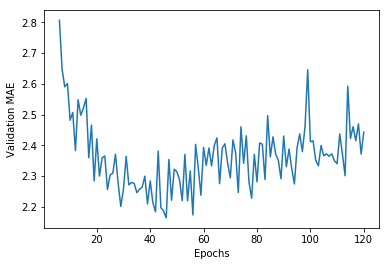

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1)[5:], average_mae_history[5:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It seems that validation MAE stops improving significantly after 50 epochs. We can now train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [17]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
history = model.fit(train_data, train_targets, validation_split =0.2,
          epochs=50, batch_size=1, verbose=1)


Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 1s 3ms/sample - loss: 199.5859 - mean_absolute_error: 10.1582 - val_loss: 45.7526 - val_mean_absolute_error: 4.6208
Epoch 2/50
323/323 [==============================] - 1s 2ms/sample - loss: 28.4069 - mean_absolute_error: 3.6345 - val_loss: 25.7597 - val_mean_absolute_error: 3.5529
Epoch 3/50
323/323 [==============================] - 1s 2ms/sample - loss: 20.6899 - mean_absolute_error: 3.0098 - val_loss: 22.1108 - val_mean_absolute_error: 3.5640
Epoch 4/50
323/323 [==============================] - 0s 1ms/sample - loss: 16.8722 - mean_absolute_error: 2.6170 - val_loss: 16.9236 - val_mean_absolute_error: 2.8950
Epoch 5/50
323/323 [==============================] - 1s 2ms/sample - loss: 15.0871 - mean_absolute_error: 2.4501 - val_loss: 15.5304 - val_mean_absolute_error: 2.7924
Epoch 6/50
323/323 [==============================] - 1s 2ms/sample - loss: 13.5261 - mean_absolute_error: 2.3332

323/323 [==============================] - 1s 2ms/sample - loss: 5.9921 - mean_absolute_error: 1.5769 - val_loss: 9.6678 - val_mean_absolute_error: 2.3906
Epoch 50/50
323/323 [==============================] - 1s 2ms/sample - loss: 6.0268 - mean_absolute_error: 1.6614 - val_loss: 9.8871 - val_mean_absolute_error: 2.2842


In [18]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


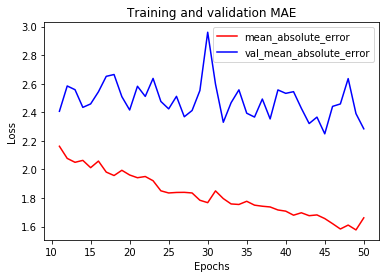

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
#mae = history.history['mae']
#val_mae = history.history['val_mae']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(mae) + 1)

plt.plot(epochs[10:], mae[10:], 'r', label='mean_absolute_error')
plt.plot(epochs[10:], val_mae[10:], 'b', label='val_mean_absolute_error')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=2)
test_mae_score

 - 0s - loss: 18.5600 - mean_absolute_error: 2.9397


2.9397457

## 2. Exercise - tuning model parameters <a id='exc' />
Please train the above model in the below two scenerios: make the changes on the indicated training configurations (the rest no change). Train both models for 120 epochs. 

**Scenerio A**:
* change the batch size from 1 to 128

**Scenerio B**:
* change the learning rate (`optimizers.RMSprop(lr=0.001)`) from 0.001 to 0.0002

Observe the training and validation MAE curves for both scenerios.

Provide your codes & observations in the below boxes.

### 2.1 Scenerio A

In [21]:
# Task 1: Build the model and no changes
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [22]:
# Task 2: Compile and Train the model for 120 epochs. Change the batch size from 1 to 128
model = build_model()
history = model.fit(train_data, train_targets, validation_split =0.2,
          epochs=120, batch_size=128, verbose=1)
model.summary()

Train on 323 samples, validate on 81 samples
Epoch 1/120
323/323 [==============================] - 0s 1ms/sample - loss: 557.5353 - mean_absolute_error: 21.7770 - val_loss: 605.9868 - val_mean_absolute_error: 22.8809
Epoch 2/120
323/323 [==============================] - 0s 66us/sample - loss: 526.2944 - mean_absolute_error: 21.0984 - val_loss: 580.6031 - val_mean_absolute_error: 22.3492
Epoch 3/120
323/323 [==============================] - 0s 46us/sample - loss: 501.5232 - mean_absolute_error: 20.5491 - val_loss: 555.5681 - val_mean_absolute_error: 21.8111
Epoch 4/120
323/323 [==============================] - 0s 34us/sample - loss: 477.3556 - mean_absolute_error: 19.9894 - val_loss: 529.7985 - val_mean_absolute_error: 21.2495
Epoch 5/120
323/323 [==============================] - 0s 56us/sample - loss: 452.7240 - mean_absolute_error: 19.4049 - val_loss: 503.4346 - val_mean_absolute_error: 20.6551
Epoch 6/120
323/323 [==============================] - 0s 54us/sample - loss: 427.4102

323/323 [==============================] - 0s 43us/sample - loss: 18.6277 - mean_absolute_error: 3.0087 - val_loss: 21.1708 - val_mean_absolute_error: 3.5840
Epoch 49/120
323/323 [==============================] - 0s 40us/sample - loss: 18.0715 - mean_absolute_error: 2.9470 - val_loss: 20.7093 - val_mean_absolute_error: 3.5168
Epoch 50/120
323/323 [==============================] - 0s 22us/sample - loss: 17.6556 - mean_absolute_error: 2.8784 - val_loss: 20.1415 - val_mean_absolute_error: 3.4655
Epoch 51/120
323/323 [==============================] - 0s 31us/sample - loss: 17.2440 - mean_absolute_error: 2.8631 - val_loss: 19.9075 - val_mean_absolute_error: 3.4740
Epoch 52/120
323/323 [==============================] - 0s 28us/sample - loss: 16.7105 - mean_absolute_error: 2.8676 - val_loss: 19.2065 - val_mean_absolute_error: 3.3683
Epoch 53/120
323/323 [==============================] - 0s 65us/sample - loss: 16.2350 - mean_absolute_error: 2.7488 - val_loss: 19.0913 - val_mean_absolute_e

323/323 [==============================] - 0s 34us/sample - loss: 9.1346 - mean_absolute_error: 2.1075 - val_loss: 14.0795 - val_mean_absolute_error: 2.5929
Epoch 97/120
323/323 [==============================] - 0s 25us/sample - loss: 9.0167 - mean_absolute_error: 2.0822 - val_loss: 13.6828 - val_mean_absolute_error: 2.6059
Epoch 98/120
323/323 [==============================] - 0s 19us/sample - loss: 8.9508 - mean_absolute_error: 2.0648 - val_loss: 14.1282 - val_mean_absolute_error: 2.5690
Epoch 99/120
323/323 [==============================] - 0s 34us/sample - loss: 9.0543 - mean_absolute_error: 2.0938 - val_loss: 13.7404 - val_mean_absolute_error: 2.6149
Epoch 100/120
323/323 [==============================] - 0s 25us/sample - loss: 8.9094 - mean_absolute_error: 2.0468 - val_loss: 14.7714 - val_mean_absolute_error: 2.6008
Epoch 101/120
323/323 [==============================] - 0s 91us/sample - loss: 8.8858 - mean_absolute_error: 2.0970 - val_loss: 14.5243 - val_mean_absolute_error

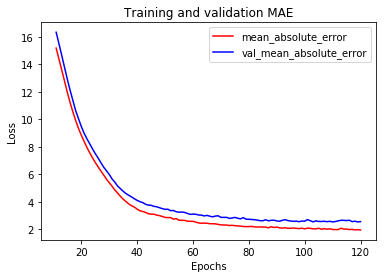

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
#mae = history.history['mae']
#val_mae = history.history['val_mae']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(mae) + 1)

plt.plot(epochs[10:], mae[10:], 'r', label='mean_absolute_error')
plt.plot(epochs[10:], val_mae[10:], 'b', label='val_mean_absolute_error')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=2)
test_mae_score

 - 0s - loss: 26.7415 - mean_absolute_error: 3.1905


3.190471

In [25]:
#Task 4: Comment on your model
#This model is a good fit as the plot of training loss decreases to a point of stability and plot of validation loss decreases to a point of stability and has a small gap with the traning loss.

### 2.2 Scenerio B

In [26]:
#Task 1: Build the model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizers.RMSprop(lr=0.0002), loss='mse', metrics=['mae'])
    return model

In [27]:
#Task 2: Compile and Fit the model. Change the learning rate from 0.001 to 0.0002 (change in build model func)
model = build_model()
history = model.fit(train_data, train_targets, validation_split =0.2, epochs = 120, batch_size = 1, verbose = 1)

model.summary()

Train on 323 samples, validate on 81 samples
Epoch 1/120
323/323 [==============================] - 1s 3ms/sample - loss: 515.3523 - mean_absolute_error: 20.7804 - val_loss: 501.4288 - val_mean_absolute_error: 20.5667
Epoch 2/120
323/323 [==============================] - 1s 2ms/sample - loss: 339.9750 - mean_absolute_error: 16.1548 - val_loss: 259.8561 - val_mean_absolute_error: 14.0418
Epoch 3/120
323/323 [==============================] - 1s 2ms/sample - loss: 125.7044 - mean_absolute_error: 8.6612 - val_loss: 75.1453 - val_mean_absolute_error: 6.0392
Epoch 4/120
323/323 [==============================] - 1s 2ms/sample - loss: 48.8772 - mean_absolute_error: 4.8464 - val_loss: 49.4549 - val_mean_absolute_error: 4.9915
Epoch 5/120
323/323 [==============================] - 1s 2ms/sample - loss: 38.4616 - mean_absolute_error: 4.2503 - val_loss: 39.9801 - val_mean_absolute_error: 4.4445
Epoch 6/120
323/323 [==============================] - 1s 2ms/sample - loss: 32.8701 - mean_absolute_

Epoch 49/120
323/323 [==============================] - 1s 2ms/sample - loss: 10.5572 - mean_absolute_error: 1.9627 - val_loss: 12.9470 - val_mean_absolute_error: 2.6614
Epoch 50/120
323/323 [==============================] - 1s 2ms/sample - loss: 10.1554 - mean_absolute_error: 1.9530 - val_loss: 13.4428 - val_mean_absolute_error: 2.6986
Epoch 51/120
323/323 [==============================] - 1s 2ms/sample - loss: 10.3295 - mean_absolute_error: 1.9364 - val_loss: 13.2433 - val_mean_absolute_error: 2.6623
Epoch 52/120
323/323 [==============================] - 1s 2ms/sample - loss: 10.3810 - mean_absolute_error: 1.9162 - val_loss: 13.1983 - val_mean_absolute_error: 2.7012
Epoch 53/120
323/323 [==============================] - 1s 2ms/sample - loss: 10.0978 - mean_absolute_error: 1.9055 - val_loss: 13.3274 - val_mean_absolute_error: 2.7079
Epoch 54/120
323/323 [==============================] - 1s 2ms/sample - loss: 10.0285 - mean_absolute_error: 1.9162 - val_loss: 13.3065 - val_mean_abs

323/323 [==============================] - 1s 2ms/sample - loss: 7.6187 - mean_absolute_error: 1.6543 - val_loss: 14.1687 - val_mean_absolute_error: 2.5392
Epoch 98/120
323/323 [==============================] - 1s 2ms/sample - loss: 7.6770 - mean_absolute_error: 1.6118 - val_loss: 14.9752 - val_mean_absolute_error: 2.5393
Epoch 99/120
323/323 [==============================] - 1s 2ms/sample - loss: 7.8262 - mean_absolute_error: 1.6255 - val_loss: 14.7228 - val_mean_absolute_error: 2.5724
Epoch 100/120
323/323 [==============================] - 1s 2ms/sample - loss: 7.7828 - mean_absolute_error: 1.6184 - val_loss: 14.6311 - val_mean_absolute_error: 2.5297
Epoch 101/120
323/323 [==============================] - 1s 2ms/sample - loss: 7.4844 - mean_absolute_error: 1.6143 - val_loss: 14.9771 - val_mean_absolute_error: 2.5822
Epoch 102/120
323/323 [==============================] - 1s 2ms/sample - loss: 7.5758 - mean_absolute_error: 1.6226 - val_loss: 14.6319 - val_mean_absolute_error: 2.5

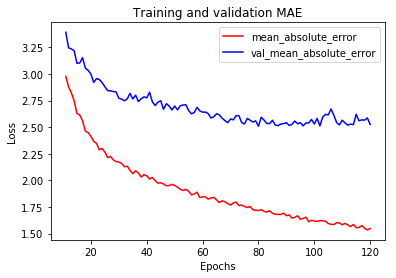

In [28]:
#Task 3: Plot the MAE (train & test) curves
import matplotlib.pyplot as plt
%matplotlib inline
#mae = history.history['mae']
#val_mae = history.history['val_mae']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(mae) + 1)

plt.plot(epochs[10:], mae[10:], 'r', label='mean_absolute_error')
plt.plot(epochs[10:], val_mae[10:], 'b', label='val_mean_absolute_error')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=2)
test_mae_score

 - 0s - loss: 23.9189 - mean_absolute_error: 2.8977


2.8977435

In [30]:
#Task 4: Comment on your model
#This model overfits after around 60 epochs. 